Certainly! Let's delve into how ridge regression works and how the penalizing function affects it.

### Ridge Regression Overview:

In linear regression, we aim to find the best-fitting line (or hyperplane) to describe the relationship between the input features (\(X\)) and the output (\(y\)). We do this by minimizing the sum of squared differences between the observed values (\(y\)) and the predicted values (\(\hat{y}\)). This is represented by the cost function:

\[ \text{Cost Function} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \]

Here, \( y_i \) are the actual values, and \( \hat{y}_i \) are the predicted values from the linear model.

### Introducing Ridge Regression:

In ridge regression, we add a penalty term to the cost function to prevent overfitting. The penalty term is proportional to the sum of the squares of the coefficients (also known as slopes or weights). This penalizing function discourages the coefficients from becoming too large.

The ridge regression cost function looks like this:

\[ \text{Cost Function (Ridge)} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 \]

where:
- \( \sum_{i=1}^n (y_i - \hat{y}_i)^2 \) is the original cost function (sum of squared residuals).
- \( \lambda \sum_{j=1}^p \beta_j^2 \) is the penalizing term.
- \( \lambda \) is a non-negative hyperparameter that controls the strength of the penalty.
- \( \beta_j \) are the coefficients of the model.
- \( p \) is the number of features.

### How the Penalizing Function Works:

1. **Regularization Effect:**
   - The penalizing term \( \lambda \sum_{j=1}^p \beta_j^2 \) adds a "cost" for having large coefficients.
   - If \(\lambda\) is very large, the penalty becomes significant, forcing the coefficients \(\beta_j\) to be smaller to minimize the overall cost function.
   - If \(\lambda\) is zero, ridge regression becomes ordinary least squares (OLS) regression with no penalty on the coefficients.

2. **Balancing Fit and Complexity:**
   - By adding the penalizing function, ridge regression strikes a balance between fitting the data well (low residuals) and keeping the model simple (small coefficients).
   - This helps to prevent overfitting, where a model might perform well on training data but poorly on unseen data due to overly complex coefficients capturing noise instead of the true underlying pattern.

### Visual Explanation:

- **Original Cost Function (OLS):**
  \[ \sum_{i=1}^n (y_i - \hat{y}_i)^2 \]
  - Goal: Minimize the sum of squared residuals.

- **Ridge Cost Function:**
  \[ \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 \]
  - Goal: Minimize the sum of squared residuals plus the penalty for large coefficients.

### Impact of \(\lambda\):

- **Small \(\lambda\):** The penalty term has little effect, so the solution is similar to OLS. Coefficients can still become large if that reduces the residuals significantly.
- **Large \(\lambda\):** The penalty term dominates, forcing the coefficients to be small, even if it means increasing the residuals a bit. This leads to a simpler model that might not fit the training data perfectly but generalizes better to new data.

### Example:

Suppose we have a simple linear model with one feature:

\[ \hat{y} = \beta_0 + \beta_1 x \]

Without penalization (OLS), we minimize:

\[ \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2 \]

With ridge regression, we minimize:

\[ \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2 + \lambda \beta_1^2 \]

Here, the term \(\lambda \beta_1^2\) discourages \(\beta_1\) from becoming too large. If \(\beta_1\) is large, the penalty \(\lambda \beta_1^2\) will be large, increasing the overall cost. Thus, the model prefers smaller \(\beta_1\) values unless a larger \(\beta_1\) significantly decreases the residual sum of squares.

### Summary:

- The penalizing function in ridge regression is designed to keep the model coefficients small, thereby preventing overfitting.
- The strength of the penalty is controlled by the hyperparameter \(\lambda\).
- This balance between fitting the data and keeping the model simple helps in building models that generalize better to unseen data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
n_samples, n_features = 50, 10
X = np.random.randn(n_samples, n_features)
true_coefs = np.array([3, 1.5, 0, 0, 2, 0, 0, 0.5, 0, 0])
y = X @ true_coefs + np.random.randn(n_samples) * 0.5

# Standardize the data (important for Lasso and Ridge regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
# Range of lambda values
lambdas = np.logspace(-4, 1, 100)

ridge_coefs = []
lasso_coefs = []

for l in lambdas:
    ridge = Ridge(alpha=l, fit_intercept=False)
    lasso = Lasso(alpha=l, fit_intercept=False, max_iter=10000)
    ridge.fit(X_scaled, y)
    lasso.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)


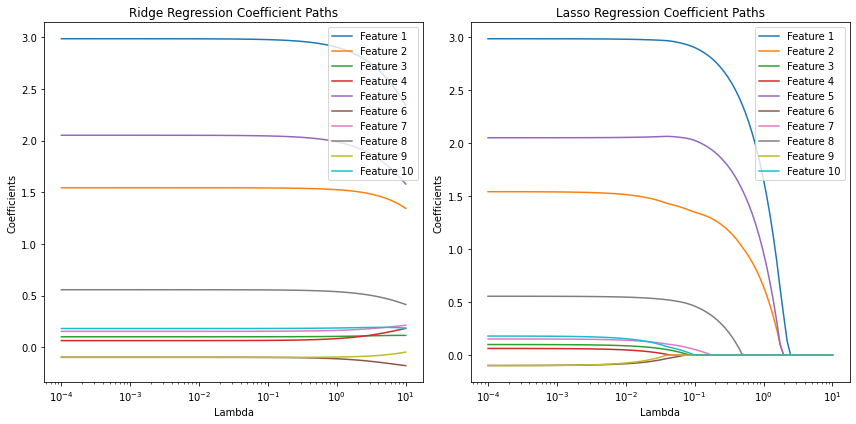

In [3]:
# Plotting the coefficient paths
plt.figure(figsize=(12, 6))

# Ridge regression paths
plt.subplot(1, 2, 1)
for i in range(n_features):
    plt.plot(lambdas, ridge_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficient Paths')
plt.legend(loc='best')

# Lasso regression paths
plt.subplot(1, 2, 2)
for i in range(n_features):
    plt.plot(lambdas, lasso_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficient Paths')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


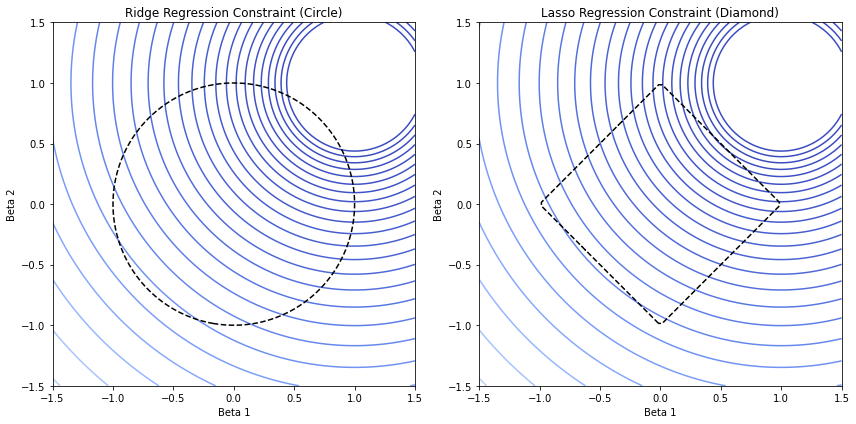

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid for the coefficients
beta1 = np.linspace(-1.5, 1.5, 100)
beta2 = np.linspace(-1.5, 1.5, 100)
B1, B2 = np.meshgrid(beta1, beta2)

# Define the cost function for a simple linear regression problem
cost_function = B1**2 + B2**2 - 2*B1 - 2*B2 + 2

# Define the constraint regions for Ridge and Lasso
ridge_constraint = B1**2 + B2**2  # Circle (L2 norm)
lasso_constraint = np.abs(B1) + np.abs(B2)  # Diamond (L1 norm)

# Plot the contours and the constraint regions
plt.figure(figsize=(12, 6))

# Ridge regression
plt.subplot(1, 2, 1)
plt.contour(B1, B2, cost_function, levels=np.logspace(-0.5, 1.5, 30), cmap='coolwarm')
plt.contour(B1, B2, ridge_constraint, levels=[1], colors='black', linestyles='dashed')
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Ridge Regression Constraint (Circle)')

# Lasso regression
plt.subplot(1, 2, 2)
plt.contour(B1, B2, cost_function, levels=np.logspace(-0.5, 1.5, 30), cmap='coolwarm')
plt.contour(B1, B2, lasso_constraint, levels=[1], colors='black', linestyles='dashed')
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Lasso Regression Constraint (Diamond)')

plt.tight_layout()
plt.show()
